<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week7/day3/ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

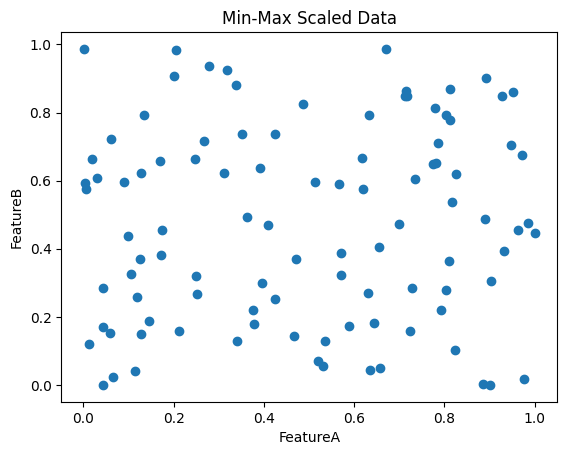

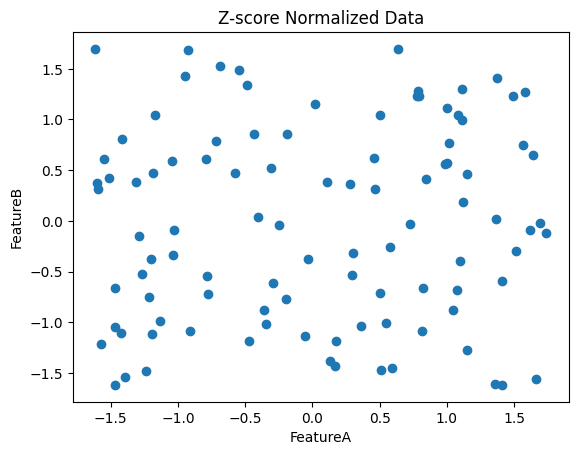

Min-Max Scaled Data:
Mean: 0.48177889447236183
Standard Deviation: 0.297852304257727

Z-score Normalized Data:
Mean: -1.7763568394002505e-17
Standard Deviation: 1.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

X = np.random.randint(0, 1000, size=(100, 2))

X_minmax = (X - X.min()) / (X.max() - X.min())

plt.scatter(X_minmax[:, 0], X_minmax[:, 1])
plt.xlabel("FeatureA")
plt.ylabel("FeatureB")
plt.title("Min-Max Scaled Data")
plt.show()

X_zscore = (X - X.mean()) / X.std()

plt.scatter(X_zscore[:, 0], X_zscore[:, 1])
plt.xlabel("FeatureA")
plt.ylabel("FeatureB")
plt.title("Z-score Normalized Data")
plt.show()

print("Min-Max Scaled Data:")
print("Mean:", X_minmax.mean())
print("Standard Deviation:", X_minmax.std())
print()
print("Z-score Normalized Data:")
print("Mean:", X_zscore.mean())
print("Standard Deviation:", X_zscore.std())


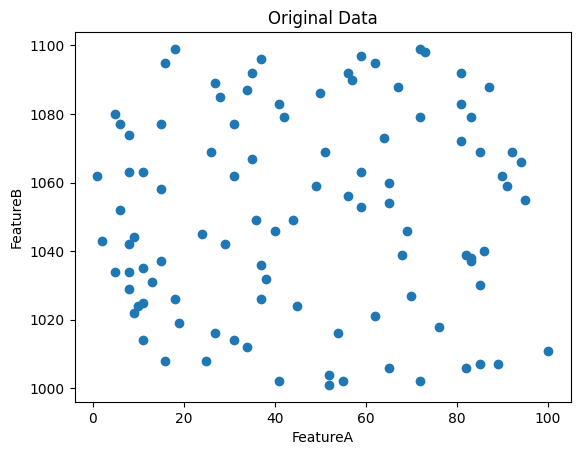

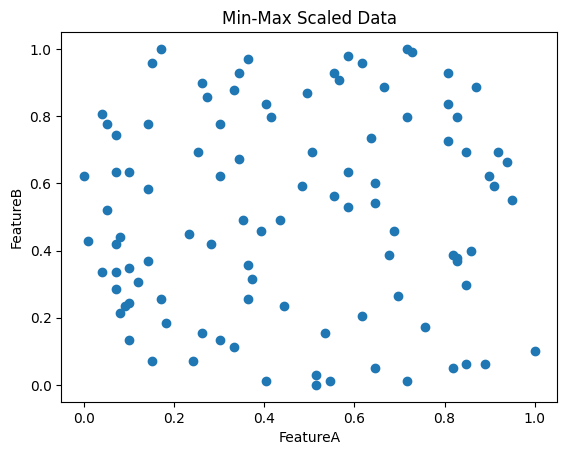

Original Data:
Mean: 548.295
Standard Deviation: 503.09143102919177

Min-Max Scaled Data:
Mean: 0.48028138528138525
Standard Deviation: 0.2937765639821325


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = np.random.randint(1, 101, size=(100, 2))
X[:, 1] += 999

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("FeatureA")
plt.ylabel("FeatureB")
plt.title("Original Data")
plt.show()

plt.scatter(X_minmax[:, 0], X_minmax[:, 1])
plt.xlabel("FeatureA")
plt.ylabel("FeatureB")
plt.title("Min-Max Scaled Data")
plt.show()

print("Original Data:")
print("Mean:", X.mean())
print("Standard Deviation:", X.std())
print()
print("Min-Max Scaled Data:")
print("Mean:", X_minmax.mean())
print("Standard Deviation:", X_minmax.std())


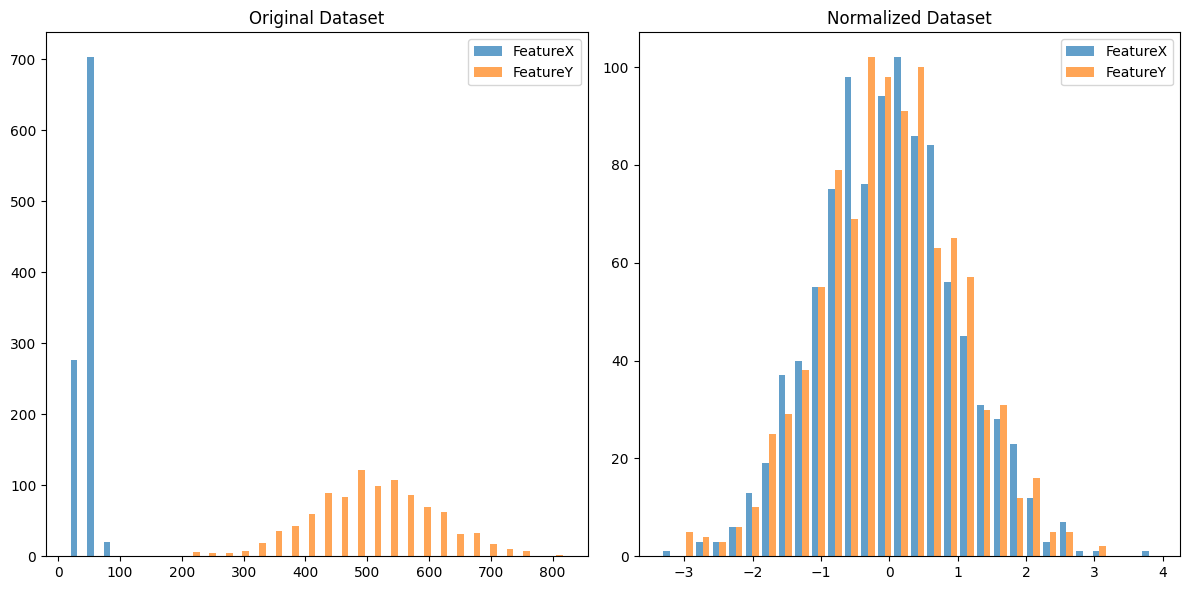

Original Dataset Statistics:
Mean of FeatureX: 50.193320558223256
Standard Deviation of FeatureX: 9.787262077473542
Mean of FeatureY: 507.0836237249155
Standard Deviation of FeatureY: 99.69555252946301

Normalized Dataset Statistics:
Mean of FeatureX: -1.5658585539313207e-15
Standard Deviation of FeatureX: 1.0
Mean of FeatureY: -7.329248319365434e-15
Standard Deviation of FeatureY: 1.0000000000000004


In [7]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

num_samples = 1000
featureX = np.random.normal(loc=50, scale=10, size=num_samples)
featureY = np.random.normal(loc=500, scale=100, size=num_samples)
dataset = np.column_stack((featureX, featureY))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Dataset")
plt.hist(dataset, bins=30, alpha=0.7, label=['FeatureX', 'FeatureY'])
plt.legend()

scaler = StandardScaler()
normalized_dataset = scaler.fit_transform(dataset)

plt.subplot(1, 2, 2)
plt.title("Normalized Dataset")
plt.hist(normalized_dataset, bins=30, alpha=0.7, label=['FeatureX', 'FeatureY'])
plt.legend()

plt.tight_layout()
plt.show()


print("Original Dataset Statistics:")
print("Mean of FeatureX:", np.mean(featureX))
print("Standard Deviation of FeatureX:", np.std(featureX))
print("Mean of FeatureY:", np.mean(featureY))
print("Standard Deviation of FeatureY:", np.std(featureY))

print("\nNormalized Dataset Statistics:")
print("Mean of FeatureX:", np.mean(normalized_dataset[:, 0]))
print("Standard Deviation of FeatureX:", np.std(normalized_dataset[:, 0]))
print("Mean of FeatureY:", np.mean(normalized_dataset[:, 1]))
print("Standard Deviation of FeatureY:", np.std(normalized_dataset[:, 1]))


In [11]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


boston_df = pd.read_csv("HousingData.csv")

selected_features = ['CRIM', 'RM', 'MEDV']

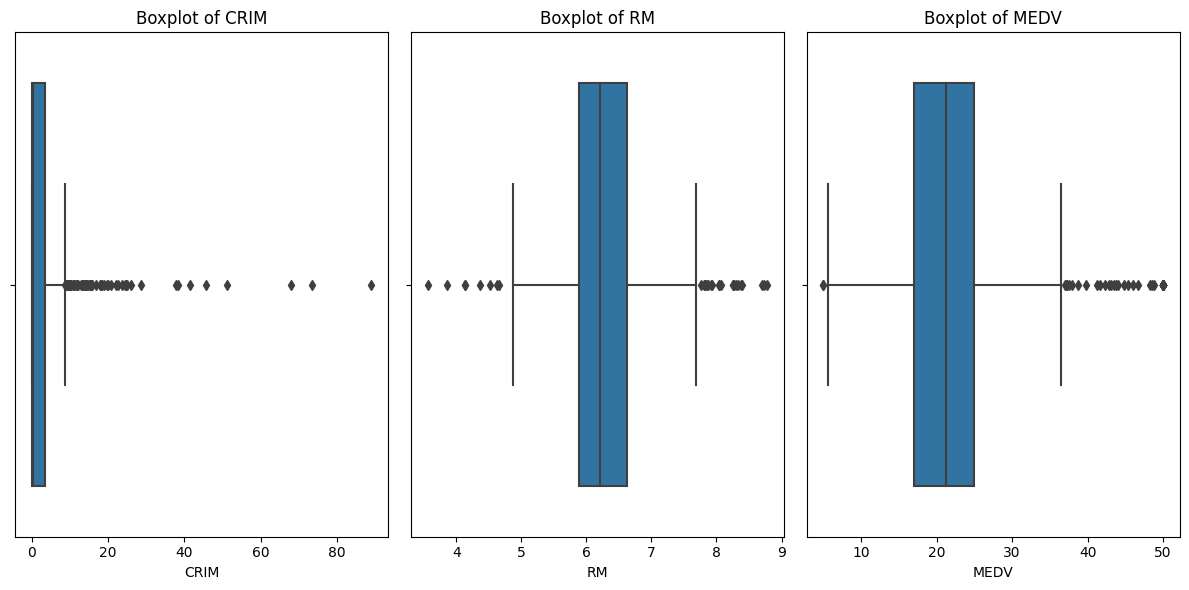

Indices of outliers:
Int64Index([225, 257, 262, 364, 365, 367, 374, 406], dtype='int64')
Overlapping outliers:
Int64Index([225, 257, 262, 364, 365, 367, 374, 406], dtype='int64')
Outliers identified by box plots:
Int64Index([356, 365, 367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381,
            382, 384, 385, 386, 387, 388, 392, 398, 399, 400, 401, 402, 403,
            404, 405, 406, 407, 410, 411, 412, 413, 414, 415, 416, 417, 418,
            419, 420, 422, 424, 425, 427, 429, 431, 434, 435, 436, 437, 438,
            439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
            479],
           dtype='int64')


In [12]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=boston_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

z_scores = zscore(boston_df[selected_features])

outliers = (np.abs(z_scores) > 3).any(axis=1)

print("Indices of outliers:")
print(boston_df[outliers].index)


overlapping_outliers = boston_df[outliers]
boxplot_outliers = boston_df[
    (boston_df['CRIM'] > boston_df['CRIM'].quantile(0.75) + 1.5 * (boston_df['CRIM'].quantile(0.75) - boston_df['CRIM'].quantile(0.25))) |
    (boston_df['RM'] < boston_df['RM'].quantile(0.25) - 1.5 * (boston_df['RM'].quantile(0.75) - boston_df['RM'].quantile(0.25))) |
    (boston_df['MEDV'] < boston_df['MEDV'].quantile(0.25) - 1.5 * (boston_df['MEDV'].quantile(0.75) - boston_df['MEDV'].quantile(0.25)))
]

print("Overlapping outliers:")
print(overlapping_outliers.index)

print("Outliers identified by box plots:")
print(boxplot_outliers.index)

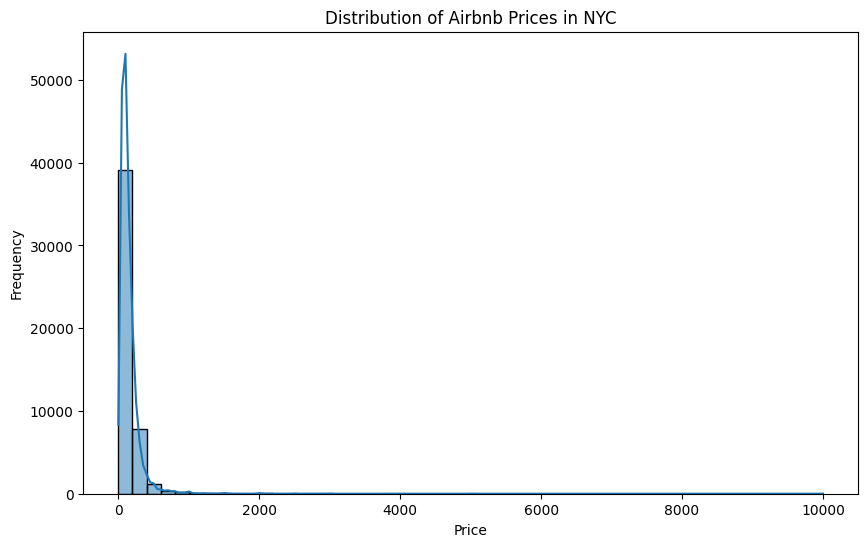

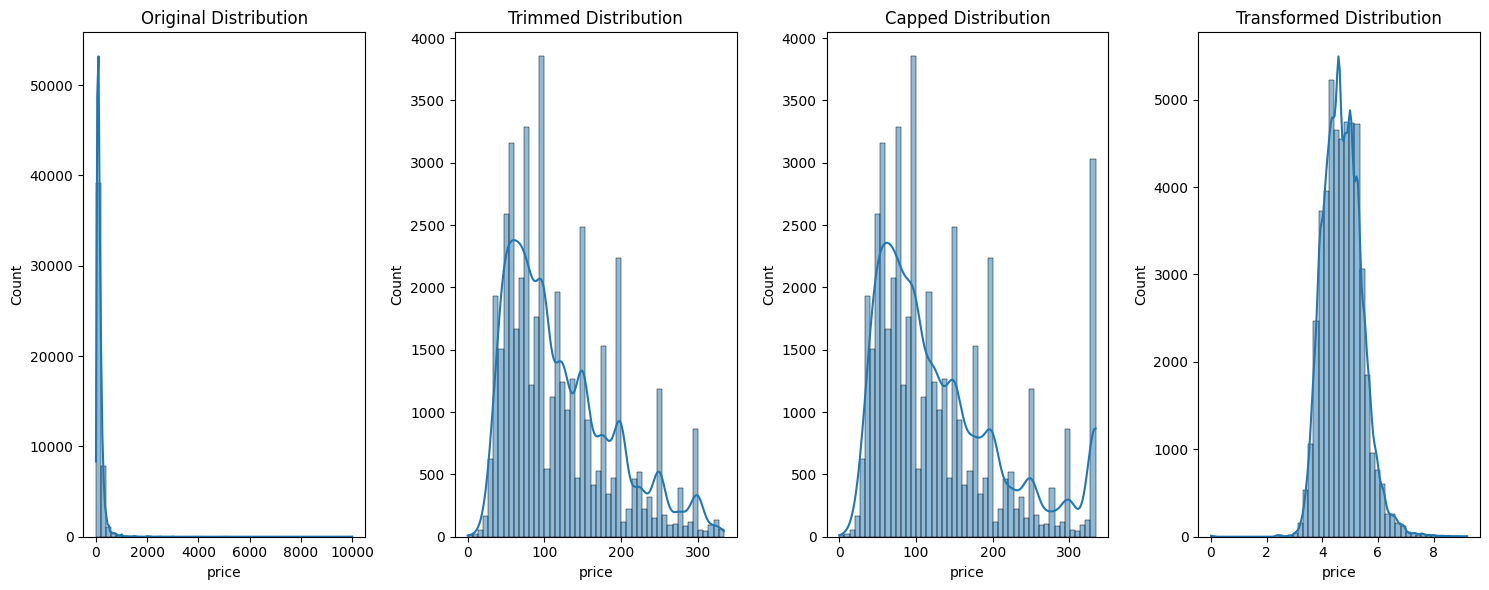

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

airbnb_df = pd.read_csv("AB_NYC_2019.csv")

plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Q1 = airbnb_df['price'].quantile(0.25)
Q3 = airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (airbnb_df['price'] < lower_bound) | (airbnb_df['price'] > upper_bound)

trimmed_df = airbnb_df[~outliers]

capped_df = airbnb_df.copy()
capped_df['price'] = capped_df['price'].clip(lower=lower_bound, upper=upper_bound)

transformed_df = airbnb_df.copy()
transformed_df['price'] = np.log1p(transformed_df['price'])

plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
sns.histplot(airbnb_df['price'], bins=50, kde=True)
plt.title('Original Distribution')

plt.subplot(1, 4, 2)
sns.histplot(trimmed_df['price'], bins=50, kde=True)
plt.title('Trimmed Distribution')

plt.subplot(1, 4, 3)
sns.histplot(capped_df['price'], bins=50, kde=True)
plt.title('Capped Distribution')

plt.subplot(1, 4, 4)
sns.histplot(transformed_df['price'], bins=50, kde=True)
plt.title('Transformed Distribution')

plt.tight_layout()
plt.show()


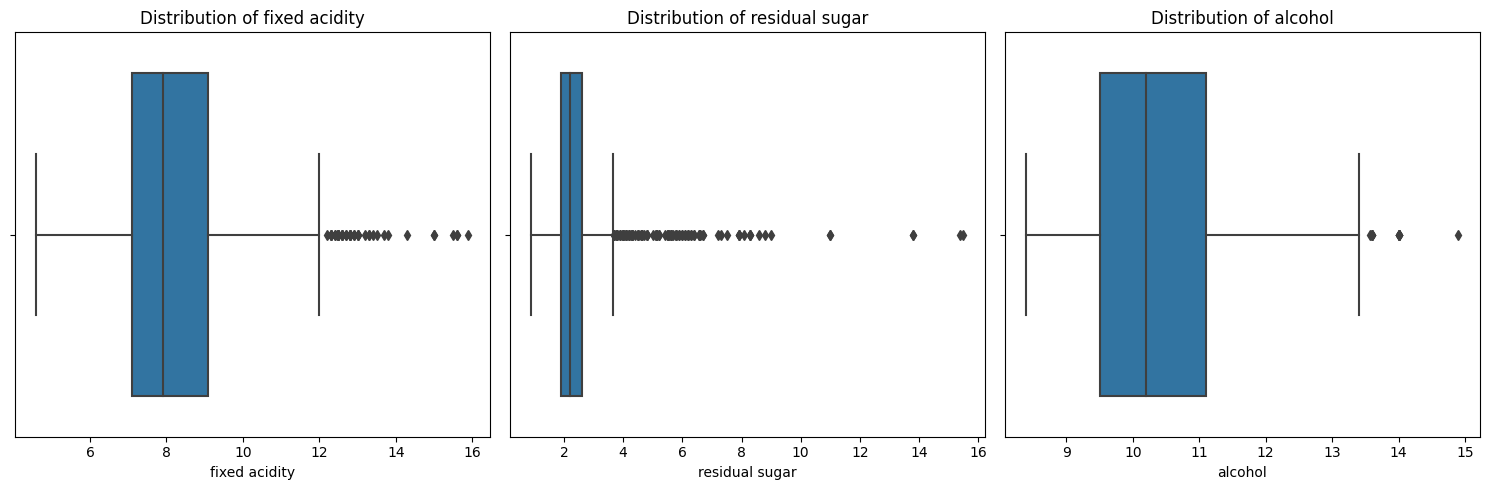

          Feature  Mean without outliers  Std without outliers  \
0   fixed acidity               8.116652              1.467221   
1  residual sugar               2.181849              0.451201   
2         alcohol              10.405364              1.026398   

   Mean with outliers  Std with outliers  
0            8.311111           1.747595  
1            2.532152           1.355917  
2           10.442111           1.082196  


In [16]:
wine_df = pd.read_csv("WineQT.csv")

features_to_analyze = ['fixed acidity', 'residual sugar', 'alcohol']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=wine_df[feature])
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

def identify_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[feature] < lower_bound) | (data[feature] > upper_bound)
    return outliers

outliers_dict = {feature: identify_outliers(wine_df, feature) for feature in features_to_analyze}

summary_data = []

for feature in features_to_analyze:
    without_outliers = wine_df[~outliers_dict[feature]][feature]
    with_outliers = wine_df[feature]

    summary_data.append({
        'Feature': feature,
        'Mean without outliers': without_outliers.mean(),
        'Std without outliers': without_outliers.std(),
        'Mean with outliers': with_outliers.mean(),
        'Std with outliers': with_outliers.std(),
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df)
